Loaded ABC history.
Max generation (t): 14
Max generation (t): 14
Posterior dataframe head:


name,adhesion,fragment_rate,heading_sigma,init_n_clusters,merge_prob,prolif_rate,speed_meanlog,speed_sdlog
id,,,,,,,,
2802,0.943838,0.005483,0.760500,926.804876,0.754412,0.007841,1.316333,0.549734
2803,0.637550,0.002315,0.755227,734.257655,0.834520,0.010616,1.492969,0.485671
2804,0.944387,0.001880,0.646517,1052.584041,0.871972,0.006707,0.588265,1.257255
2805,0.625817,0.003159,0.611702,708.569726,0.831743,0.011604,1.049897,0.925913
2806,0.671023,0.002563,0.708737,850.391555,0.849499,0.009190,1.168102,0.765207


Posterior dataframe head:


name,adhesion,fragment_rate,heading_sigma,init_n_clusters,merge_prob,prolif_rate,speed_meanlog,speed_sdlog
id,,,,,,,,
2802,0.869680,0.002720,0.773064,851.547501,0.949986,0.006506,-0.036192,1.146607
2803,0.572333,0.003824,0.529917,995.082749,0.559189,0.005322,0.551439,0.526626
2804,0.673045,0.003586,0.463344,1146.867557,0.824722,0.004066,-0.042270,1.004338
2805,0.723151,0.005291,0.610551,1452.950620,0.715958,0.002211,0.423831,0.661892
2806,0.431180,0.002628,0.697423,1209.455477,0.896890,0.004465,0.586325,0.359600


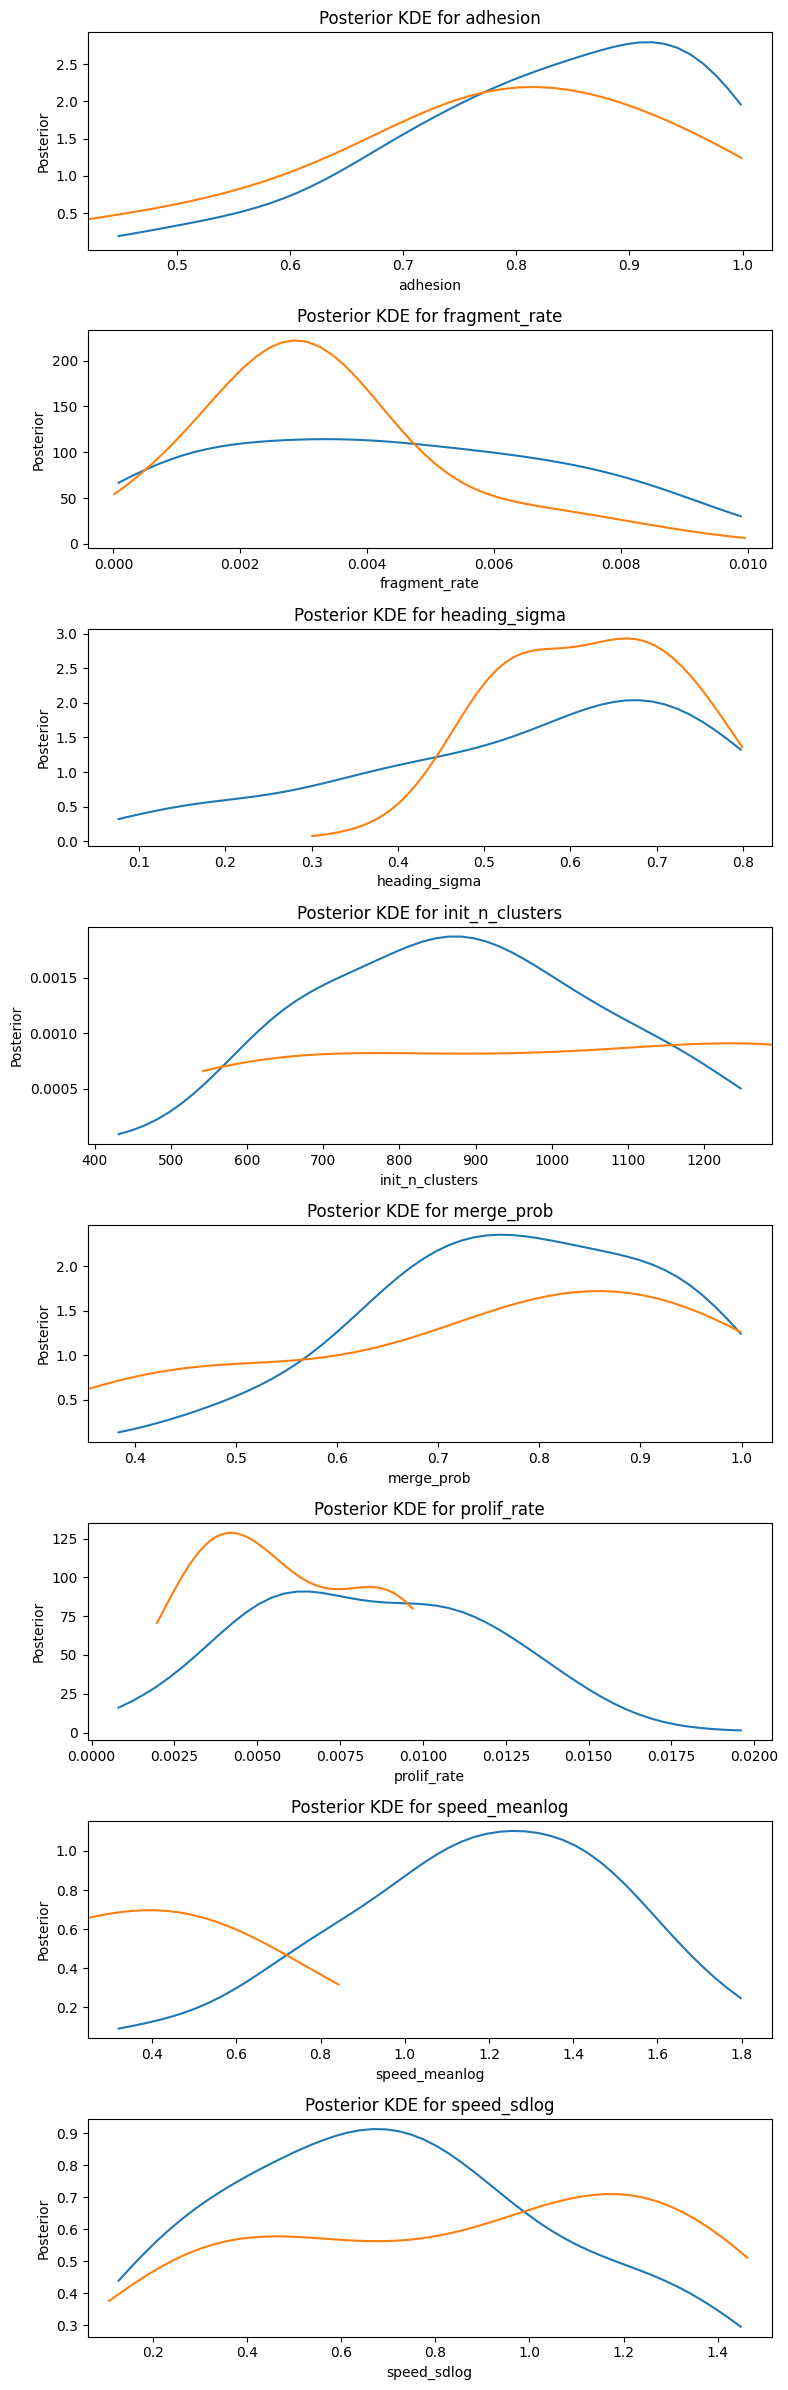

<Figure size 1000x1000 with 0 Axes>

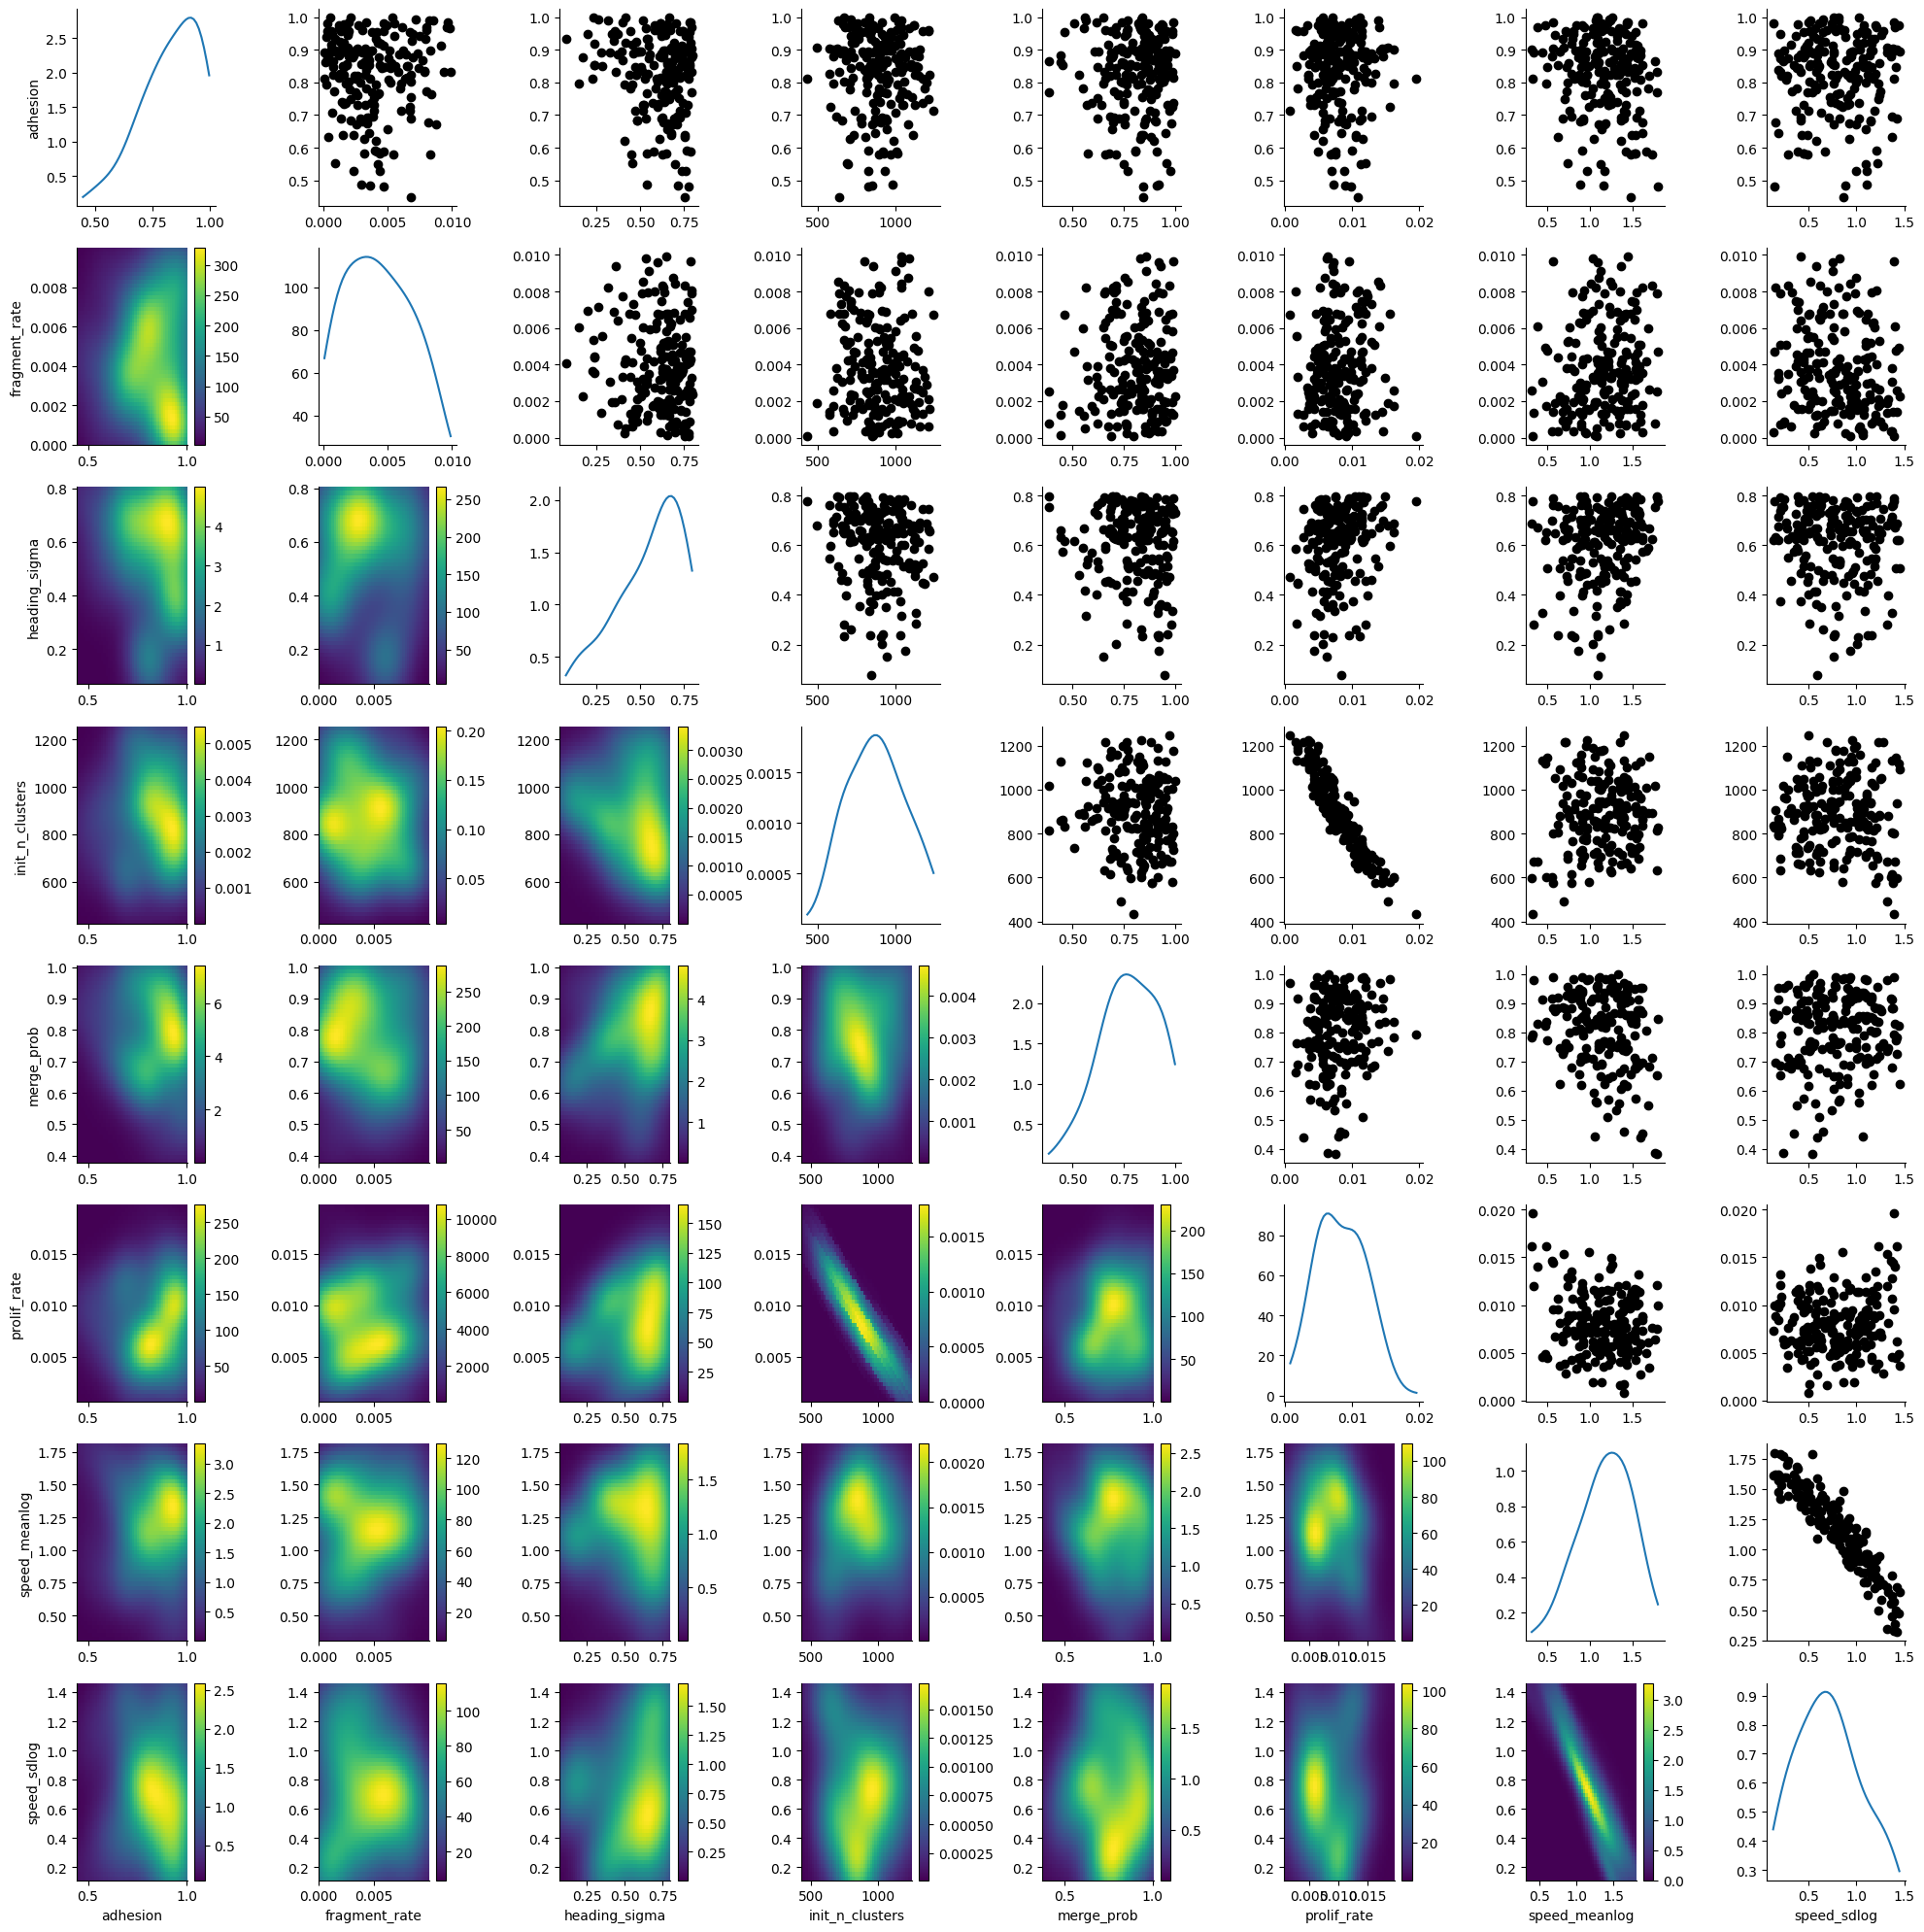

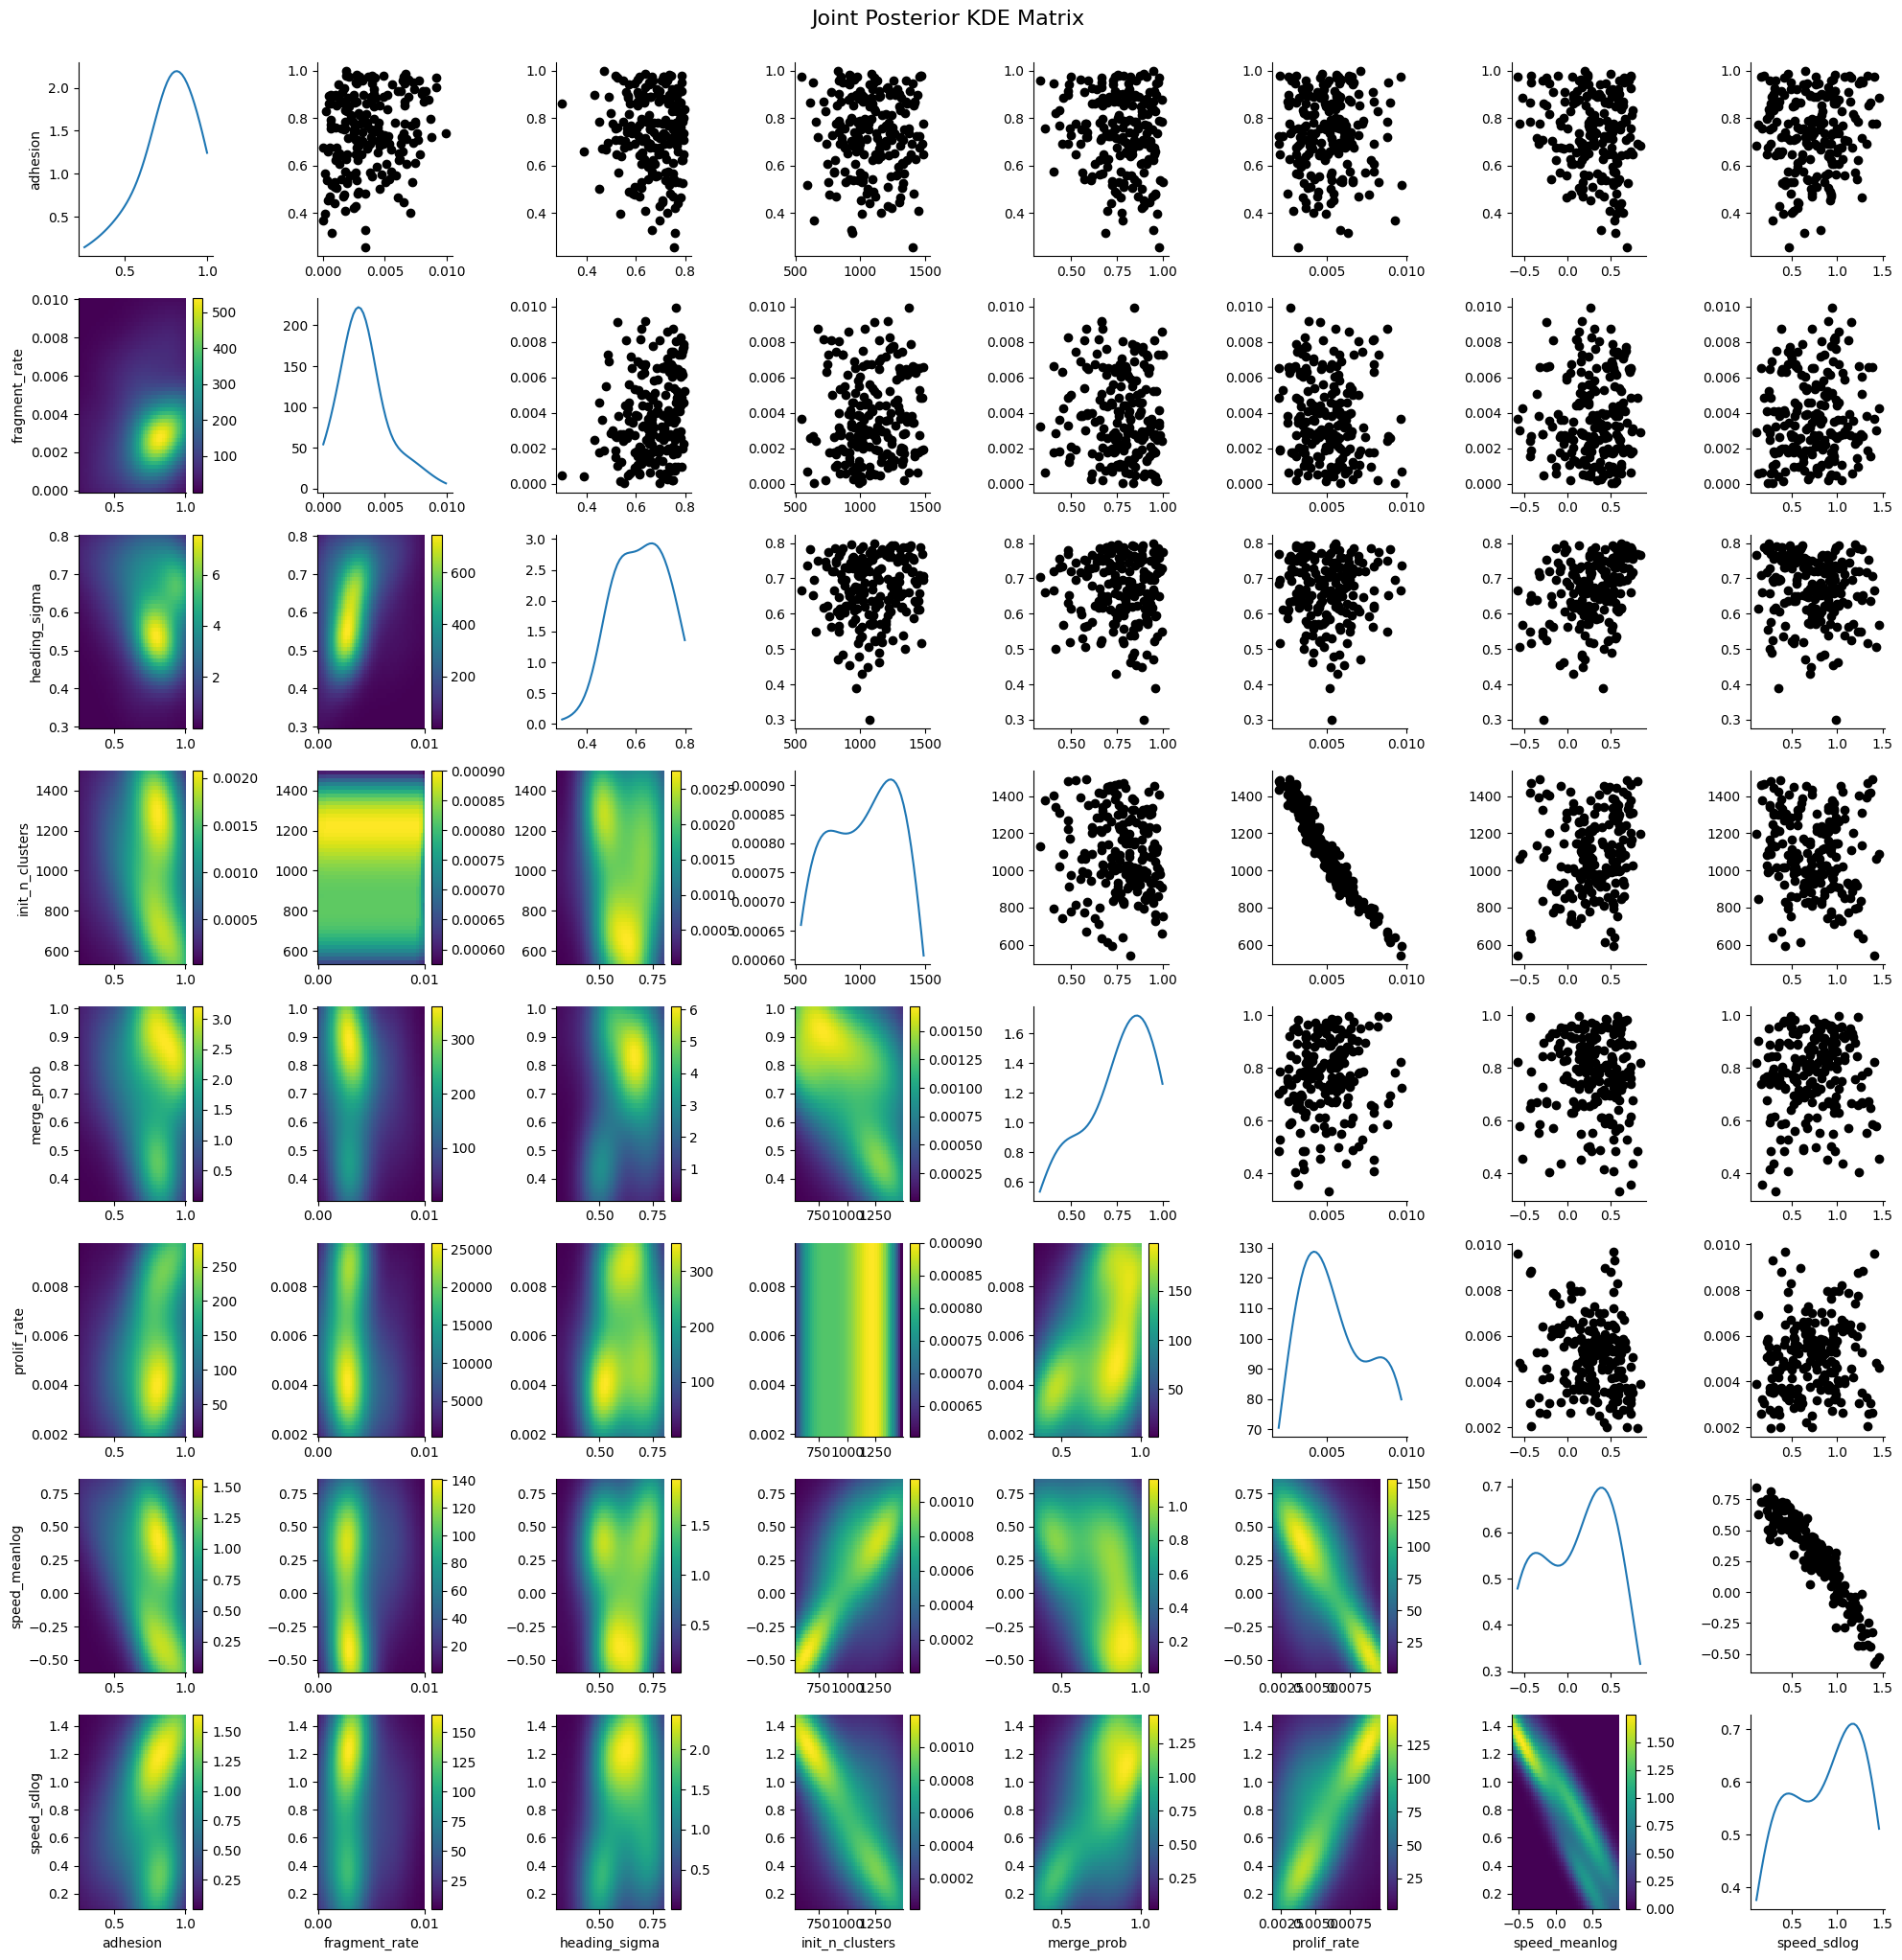

<Figure size 800x400 with 0 Axes>

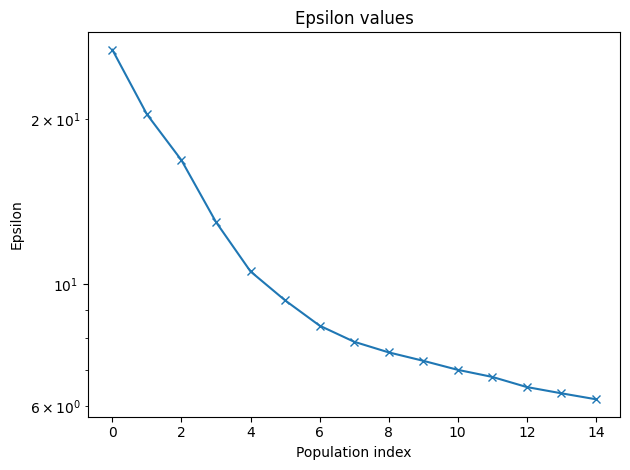

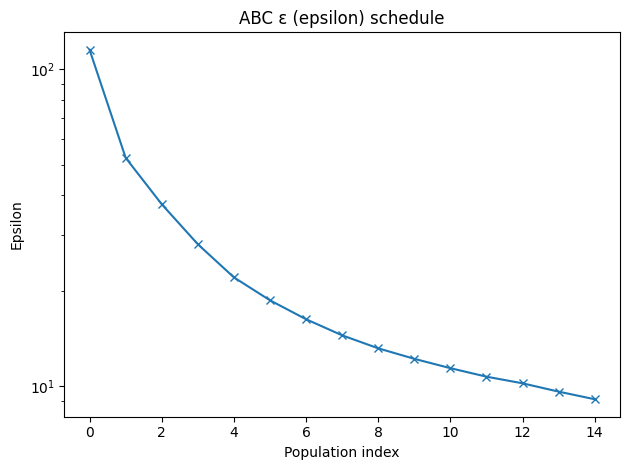

AttributeError: module 'pyabc.visualization' has no attribute 'plot_acceptance_rates'

<Figure size 800x400 with 0 Axes>

In [6]:

# ================================================================
#  ABC-SMC POSTERIOR ANALYSIS NOTEBOOK
# ================================================================
# This notebook:
#  - loads ABC results from SQLite .db
#  - extracts posterior distributions
#  - plots 1D and 2D KDEs
#  - plots epsilon trajectory
#  - plots distance distribution across generations
#  - performs posterior predictive checks (optional)
# ================================================================

from pyabc import History
import pyabc.visualization as viz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ---------------------------------------------------------------
# Load ABC history
# ---------------------------------------------------------------
# db_path = "sqlite:///results/abc_mahalanobis_no_gr.db"
db_path_1 = "sqlite:///results/abc_15_pop_INV_ABM_ready_summary_persistent_lognorm_seed42_20260117_221654.db"
db_path_2 = "sqlite:///results/abc_15_pop_PRO_ABM_ready_summary_persistent_lognorm_seed42_20260118_005640.db"

h1 = History(db_path_1)
h2 = History(db_path_2)

print("Loaded ABC history.")
print(f"Max generation (t): {h1.max_t}")
print(f"Max generation (t): {h2.max_t}")

# ---------------------------------------------------------------
# Extract posterior for final generation
# ---------------------------------------------------------------
df_1, w_1 = h1.get_distribution(m=0, t=h1.max_t)
print("Posterior dataframe head:")
display(df_1.head())

df_2, w_2 = h2.get_distribution(m=0, t=h2.max_t)
print("Posterior dataframe head:")
display(df_2.head())

# ---------------------------------------------------------------
# Plot 1D KDE for every parameter in the posterior
# ---------------------------------------------------------------
params_1 = df_1.columns.tolist()
params_2 = df_1.columns.tolist()

fig, axes = plt.subplots(len(params_1), 1, figsize=(8, 3 * len(params_1)))
if len(params_1) == 1:
    axes = [axes]  # ensure iterable

for ax, param in zip(axes, params_1):
    viz.plot_kde_1d(df_1, w_1, param, ax=ax)
    viz.plot_kde_1d(df_2, w_2, param, ax=ax)
    ax.set_title(f"Posterior KDE for {param}")

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# Plot full parameter correlation matrix
# ---------------------------------------------------------------
plt.figure(figsize=(10, 10))
viz.plot_kde_matrix(df_1, w_1)
viz.plot_kde_matrix(df_2, w_2)
plt.suptitle("Joint Posterior KDE Matrix", y=1.02, fontsize=16)
plt.show()

# ---------------------------------------------------------------
# Epsilon trajectory across generations
# ---------------------------------------------------------------
plt.figure(figsize=(8, 4))
viz.plot_epsilons(h1)
viz.plot_epsilons(h2)
plt.title("ABC ε (epsilon) schedule")
plt.show()

# ---------------------------------------------------------------
# Distance distribution across generations
# ---------------------------------------------------------------
# plt.figure(figsize=(8, 4))
# viz.plot_distances(h1)
# viz.plot_distances(h2)
# plt.title("ABC Distance Distribution per Generation")
# plt.show()

# ---------------------------------------------------------------
# Acceptance rate over time
# ---------------------------------------------------------------
plt.figure(figsize=(8, 4))
viz.plot_acceptance_rates(h1)
viz.plot_acceptance_rates(h2)
plt.title("Acceptance Rates per Generation")
plt.show()

# ---------------------------------------------------------------
# (Optional) Posterior Predictive Check
#
# For this section, you must:
#   - define a simulation function simulate_model(params)
#   - provide argument total_steps and sample_timesteps
#
# If you supply these, the notebook will:
#   - sample parameters from the posterior
#   - generate trajectories
#   - overlay them with the observed dataset
# ---------------------------------------------------------------

# Example placeholder, replace with your real ABM call
def simulate_model(params):
    """
    Example:
    sim = simulate_timeseries(model_factory, params, ...)
    return sim  # shape (T, K) array
    """
    raise NotImplementedError("Implement simulate_model(params) using your ABM.")

# ---- Uncomment to run PPC once simulate_model is implemented ----
"""
# Number of posterior samples to draw
n_samples = 20
posterior_samples = df.sample(n_samples, weights=w)

# Load observed data
obs = pd.read_csv("observed/INV_ABM_ready_summary.csv")
timesteps = obs["timestep"].astype(int).to_numpy()
obs_data = obs[["S0", "S1", "S2", "NND_med"]].to_numpy()

plt.figure(figsize=(10,6))

# Plot observed trajectories
plt.plot(timesteps, obs_data[:, 0], 'k-', linewidth=2, label="Observed S0")

# Run predictive simulations
for _, row in posterior_samples.iterrows():
    try:
        sim = simulate_model(dict(row))  # convert posterior row → dict
        plt.plot(timesteps, sim[:, 0], color="blue", alpha=0.2)
    except Exception as e:
        print("Simulation error:", e)

plt.title("Posterior Predictive Check (Example for S0)")
plt.xlabel("timestep")
plt.ylabel("S0")
plt.legend()
plt.show()
"""

print("Notebook complete. Inspect plots above.")
